In [115]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("C:\\Users\\cheta\\Downloads\\bengaluru_house_prices.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

## droping the features that are not required in the model 

In [9]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis=1)
df2.shape

(13320, 5)

## Data Cleaning and handling Null Values

In [10]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2.shape

(13320, 5)

## there are a lot of values and droping these 100 values doesn't impact the model in learning

In [12]:
df3 = df2.dropna()
df3.shape

(13246, 5)

In [13]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Feature Engineering

In [15]:
df3.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


## Adding new feature bhk in Interger format 

In [16]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))

C:\Users\cheta\AppData\Local\Temp\ipykernel_25804\2773794992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))


In [17]:
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


## Exploring the total_sqft feature

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


## All the above shows that total_sqft can be range (eg: 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.4sq.Metre which one can be converted to square ft using unit conversion. I am going to drop such corner cases to keep things simple

In [31]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [32]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)

In [37]:
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


## Feature Engineering: Add new feature called price per square feet

In [38]:
df5 = df4.copy()

In [44]:
df5['price_per_sqft'] = (df5['price']*1000000/df5['total_sqft']).round(2)

In [45]:
df5.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.11
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.85


In [46]:
df5.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+04
std      1.067272e+06
min      2.678300e+03
25%      4.267701e+04
50%      5.438331e+04
75%      7.317073e+04
max      1.200000e+08
Name: price_per_sqft, dtype: float64

In [47]:
df5.to_csv('banglore.csv',index=False)

## Examining the locations which is categorical variable. We need to apply domensionality reduction technique here to reduce number of locations

In [51]:
txt = "     banana     "
txt.strip()

'banana'

In [53]:
df5.location = df5.location.apply(lambda x:x.strip())

In [55]:
location_stats = df5.location.value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [56]:
df5.shape

(13200, 7)

In [58]:
location_stats.values.sum()

13200

In [59]:
len(location_stats[location_stats>10])

240

In [61]:
len(location_stats)

1287

In [62]:
len(location_stats[location_stats<=10])

1047

# Dimensionality Reduction

## any location having count <= 10 should be labeled as other locations. This way the number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns 

In [65]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [66]:
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [68]:
len(df5.location.unique())

1287

In [69]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [70]:
len(df5.location.unique())

241

In [72]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.11
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.85
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.91
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32478.63
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,74670.57
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,181818.18
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48282.44
9,other,6 Bedroom,1020.0,6.0,370.00,6,362745.10


# Outlier Removal using business Logic

### As a Data Scientist when you have a conversation with business manage (who is expertise in real estate), he will tell you that normally square feet per bedroomo is 300 (i.e. 2bhk apartment ideally should have minimum of 600sqft), and if you have a 2bhk with 400sqft then seems to be suspecious and can be removed as an outlier/ We will remove such by keeping our minimum threshold per bkh to be 300 sqft 

In [77]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,362745.10
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.81
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62962.96
70,other,3 Bedroom,500.0,3.0,100.0,3,200000.00


#### Seeing the above data 600 sqft for a 8bhk is highly impossible, there are the cleat data errors that can be removed 

In [78]:
df5.shape

(13200, 7)

In [82]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]

In [83]:
df6.shape

(12456, 7)

# Outlier Removal Using Standard Deviation and mean

In [87]:
df6.price_per_sqft.describe()

count    1.245600e+04
mean     6.308503e+04
std      4.168127e+04
min      2.678300e+03
25%      4.210526e+04
50%      5.294118e+04
75%      6.916667e+04
max      1.764706e+06
Name: price_per_sqft, dtype: float64

### Here we find that the min price per sqft is 267 Rs/sqft and the max price is 1764706, this shows that there is a wide variation in property price. We should remove outliers per location using mean and one standard deviation

In [95]:
df6.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.11
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.85


In [107]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [109]:
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

In [112]:
df7.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,150175.44
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,119018.40


### Let's check it for the given location how does the 2 BHK and 3 BHK property prices lok like

In [118]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    

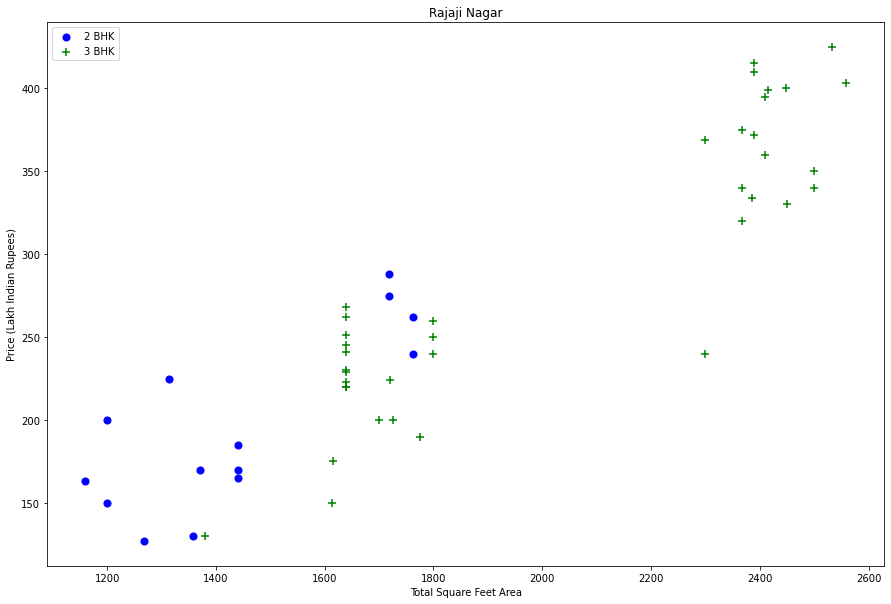

In [120]:
plot_scatter_chart(df7,'Rajaji Nagar')

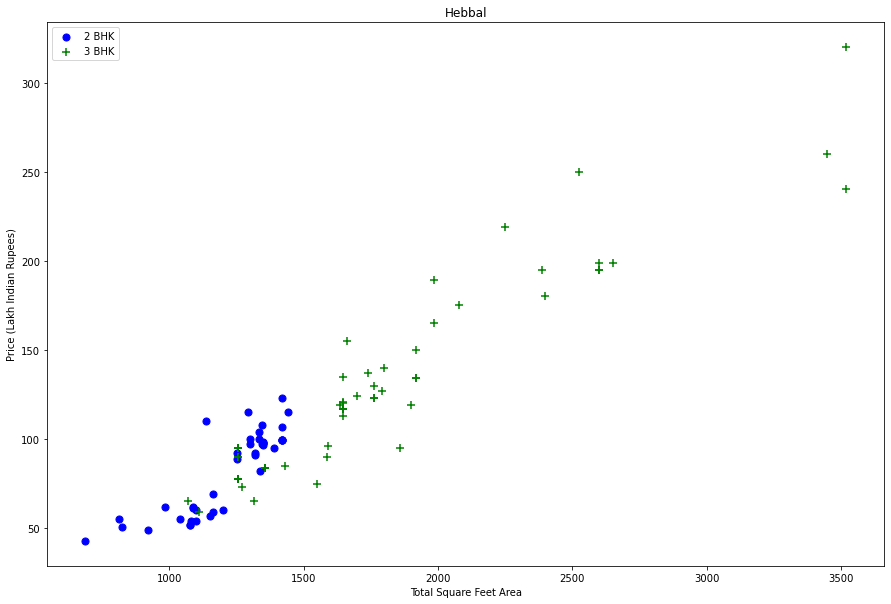

In [121]:
plot_scatter_chart(df7,"Hebbal")

### We should remove properties where the price of 3 bedroom appartment is less than 2 bedroom apartment (with same sqft), for this we will do like for a given location we build a dictionary of stats per bhk

#### Now we can remove those 2bhk appartment whose price is less that the price of the 1bhk appartments 

In [145]:
df7.bhk.value_counts()

2     4756
3     4002
4      745
1      518
5      108
6       62
7       20
8       16
9        8
10       3
11       2
16       1
13       1
Name: bhk, dtype: int64

In [130]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7317, 7)

In [158]:
bhk_stats

{1: {'mean': 53753.335563909786, 'std': 24293.073150431897, 'count': 133},
 2: {'mean': 52945.61674111665, 'std': 19802.027978498598, 'count': 985},
 3: {'mean': 63045.714563445865, 'std': 25509.039786151105, 'count': 859},
 4: {'mean': 83341.5925, 'std': 28929.656815617156, 'count': 224},
 5: {'mean': 71893.30952380953, 'std': 33439.37869404473, 'count': 42},
 6: {'mean': 69755.62323529412, 'std': 30433.045796748323, 'count': 34},
 7: {'mean': 44160.450833333336, 'std': 18808.046412807147, 'count': 12},
 8: {'mean': 53843.46857142857, 'std': 19466.29844039064, 'count': 7},
 9: {'mean': 55308.425, 'std': 32342.30746109382, 'count': 4},
 10: {'mean': 90056.82, 'std': 46306.82000000001, 'count': 2},
 11: {'mean': 48500.0, 'std': 23500.0, 'count': 2},
 13: {'mean': 50691.24, 'std': 0.0, 'count': 1},
 16: {'mean': 55000.0, 'std': 0.0, 'count': 1}}

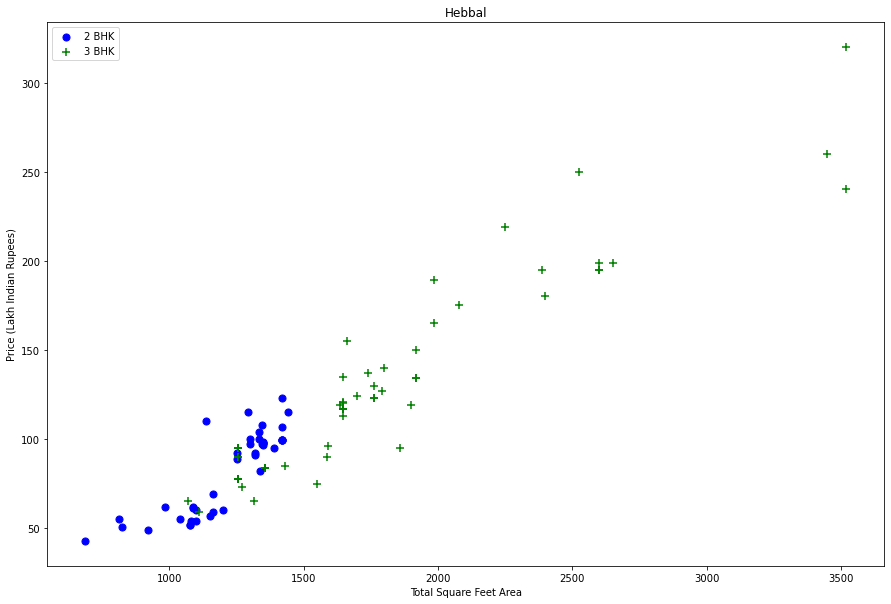

In [164]:
plot_scatter_chart(df7,'Hebbal')

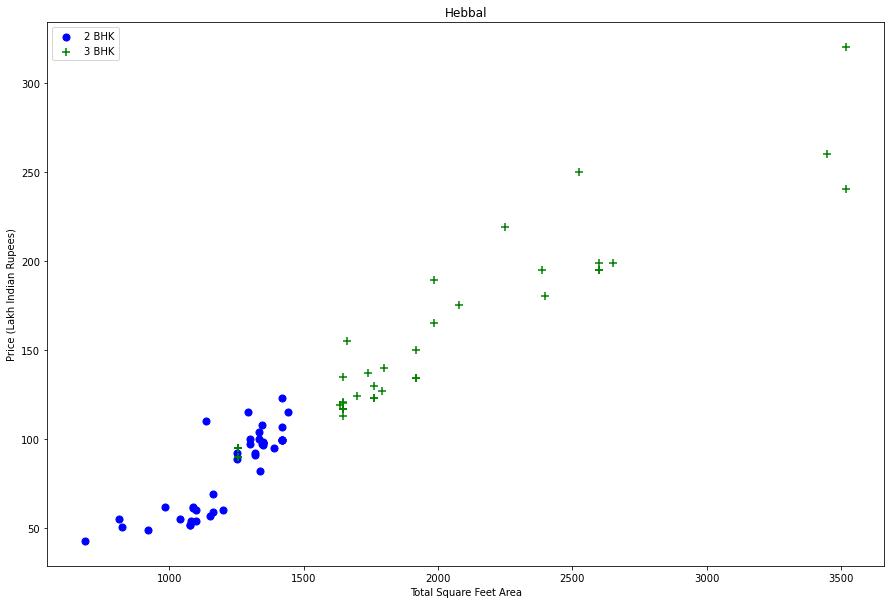

In [165]:
plot_scatter_chart(df8,'Hebbal')

### Now we can that after removing outlier for the 2bhk and 3bhk apartments we can the outliers are cleared and can see the clear graphs 

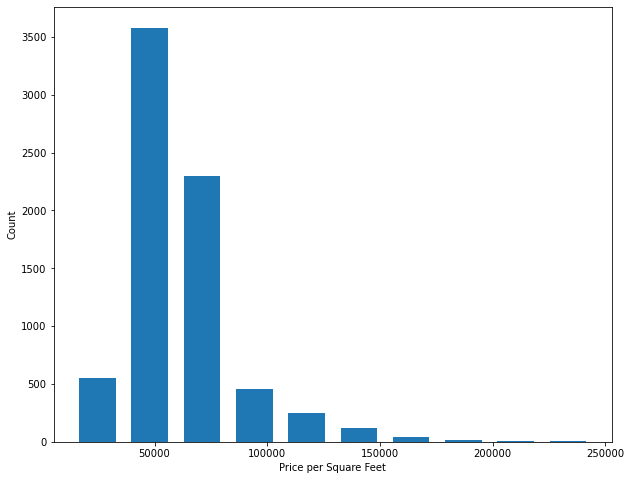

In [173]:
plt.figure(figsize=(10,8))
plt.hist(df8.price_per_sqft,rwidth=0.7)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")
plt.show()

# Outlier Removal Using Bathroom Feature

In [174]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

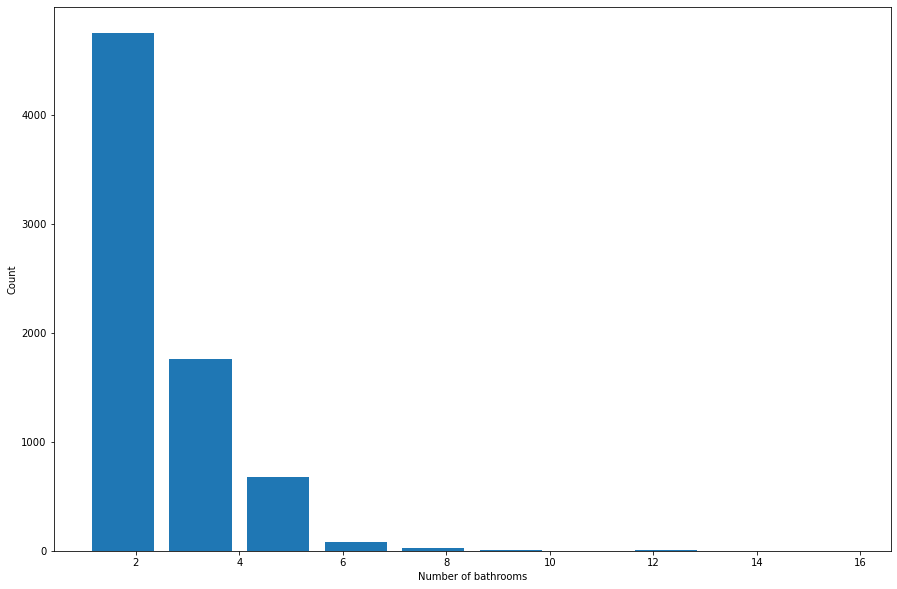

In [176]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [177]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,40000.00
8483,other,10 BHK,12000.0,12.0,525.0,10,43750.00
8572,other,16 BHK,10000.0,16.0,550.0,16,55000.00
9306,other,11 BHK,6000.0,12.0,150.0,11,25000.00
9637,other,13 BHK,5425.0,13.0,275.0,13,50691.24


### It is unsuall too have more the 2 bath rooms than number of bedrooms in a home 

In [178]:
df8[df8.bath> df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32520.33
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64285.71
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64230.34
8408,other,6 BHK,11338.0,9.0,1000.0,6,88198.98


### Again After dicussing with the business manager he says that if you have 4 bed rooms and even you have Bath room for all the 4 rooms plus one guest bath room, you will have have "total_bath_room" = total+bed_room + 1 at max, Any thing above this is called outlier or data error and can be removed 

In [179]:
df9 = df8[df8.bath< df8.bhk+2]
df9.shape

(7239, 7)

In [181]:
df10 = df9.drop(['size','price_per_sqft'],axis=1)

In [183]:
df10.head(4)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3


# We have decided the required features for our model to learn

## Use One Hot Encoding For Location  

In [186]:
dummies = pd.get_dummies(df10.location)
dummies.head(4)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
df11 = pd.concat([df10,dummies.drop('other',axis=1)],axis=1)

In [188]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
df12 = df11.drop(['location'],axis=1)

In [190]:
df12.head(4)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
df12.shape

(7239, 244)

# Start Building Model

In [192]:
X = df12.drop(['price'],axis=1)
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
X.shape

(7239, 243)

In [196]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [197]:
len(y)

7239

In [209]:
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [199]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [200]:
lr = LinearRegression()

In [201]:
lr.fit(X_train,y_train)

LinearRegression()

In [203]:
lr.score(x_test,y_test)

0.8629132245229443

# Using K Fold Cross validation to measure accuracy of our Linear Regression model

In [208]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),
               X,
               y,
               cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

#### We can see that all the 5 validation scores show above 80%, This is pretty good but we want to test few other algorithms for regression to see if we can get the better score. We will use GridSearchCV for this purpose 

# Finding the best model using GridSearchCv

In [220]:
def find_best_model_using_gridSearchCV(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge':{
            'model':Ridge(),
            'params': {
                'alpha':[1,2]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(estimator = config['model'], 
                          param_grid = config['params'],
                          cv=cv,
                          return_train_score=False
                         )
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns = ['model','best_score','best_params'])

In [221]:
find_best_model_using_gridSearchCV(X,y)

C:\Users\cheta\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\cheta\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726749,"{'alpha': 2, 'selection': 'random'}"
2,ridge,0.846798,{'alpha': 1}


### Based on the above score we can say that Linear Regression gives the best score 

# Testing the Model for Fewer Properties

In [244]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [245]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\cheta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258312184

In [246]:
predict_price('1st Phase JP Nagar',2000, 2, 3)

C:\Users\cheta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


162.4815793462515

In [250]:
predict_price('Whitefield',1200, 2, 3)

C:\Users\cheta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.2479262730447

In [248]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)